# example on the difference between convolution and fft
* convolution is flip, multiply and sum given an LTI input and its impulse response
* circular convolution assumes tha the support of the dignal is periodic
* because the input functions are periodic, the convolved output is also periodic

* it is more efficient to implement convolution by multiply in the frequency domain
* **sampling in the frequency requires periodicity in the time domain**
* fft assumes the input signal as periodic
* FFT result in circular convolution
* implicitly the circular convolution is used very frequently. Any time **DFTs (FFT) or Fourier Series are multiplied**, there is an underlying circular convolution taking place.

-The method needs to be properly modified so that linear convolution can be done (e.g. overlap-add method).

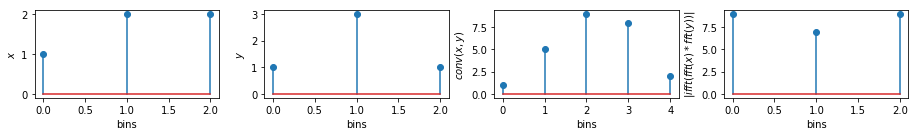

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import librosa.display
import IPython.display as ipd

x = [1,2,2]
y = [1,3,1]

conv = np.convolve(x,y)
# size is the sum of each input signal size, it is real values

fft = np.fft.ifft(np.fft.fft(x) * np.fft.fft(y))
# same size as the input signal, but complex

# plot
fig, (ax,ax2,ax3,ax4)= plt.subplots(1,4, figsize=(13, 2))
ax.stem(x)
ax.set(xlabel='bins', ylabel='$x$')
ax2.stem(y)
ax2.set(xlabel='bins', ylabel='$y$')
ax3.stem(conv)
ax3.set(xlabel='bins', ylabel='$conv(x,y)$')
ax4.stem(np.abs(fft))
ax4.set(xlabel='bins', ylabel='$|ifft(fft(x)*fft(y))|$')

plt.tight_layout()



* notice the conv has a tail that not overlap x nor y.
* the fft assumes x and y are periodic

### DFT implies circular convolution which is used for periodic signal

solution:

* zero pad x and y to avoid overlap between one period and the next

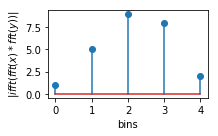

In [28]:
xpad = np.pad(x,(0, len(x)+len(y)-1), 'constant')
ypad = np.pad(y,(0, len(x)+len(y)-1), 'constant')

fftpad = np.fft.ifft(np.fft.fft(xpad) * np.fft.fft(ypad))

# plot
fig, (ax)= plt.subplots(1,1, figsize=(3, 2))
ax.stem(np.abs(fftpad[:len(x)+len(y)-1]))
ax.set(xlabel='bins', ylabel='$|ifft(fft(x)*fft(y))|$')
plt.tight_layout()

There are a few things to consider before you decide to zero pad your time-domain signal. You may not need to zero pad the signal at all!

1) Lengthen the time-domain data (not zero padding) to get better resolution in the frequency domain.

2) Increase the number of FFT points beyond your time-domain signal length (zero padding) if you would like to see better definition of the FFT bins, though it doesn't buy you any more true resolution. You can also pad to get to a power of 2 number of FFT points.

3) When fiddling with the FFT points (in the previous point), make sure your frequency points end up where you want them. The spacing of the points is fs/N, where fs is the sampling frequency and N is the number of FFT points.